In [ ]:
### To-Do
# X) work out math if extra treatment needed for lumi normalization
# 1) plot some variables before and after normalization. how do they compare?
# 2) try batch normalization in the network? re-do step1 maybe?
# 3) to_categorical for signal and background preds?
# 4) grid optimization? --> dropout rate, layers, nodes, etc
# X) k-fold validation

In [54]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import normalize, to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
import sys
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [39]:
#*** 1. Import data and check stuff
testingFraction = 0.4

# *** A. Import Dataset
qcd_raw = pd.read_csv('../samples_500k/qcd_outputDataForLearning.csv')
qcd_raw['isSignal'] = 0
hh_raw = pd.read_csv('../samples_500k/dihiggs_outputDataForLearning.csv')
hh_raw['isSignal'] = 1


# *** 2. Make mix of dihiggs and QCD for specified variables
variables_top10 = ['deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'hh_mass', 'h1_mass', 'h2_mass','hh_pt', 'h1_pt', 'h2_pt', 'scalarHT']
#variables_top10 = list(qcd_raw.columns.values)
#variables_top10.remove('isSignal')
#variables_top10.remove('isMatchable')

top10_data_train, top10_data_test, top10_labels_train, top10_labels_test = makeTestTrainSamplesWithUserVariables(hh_raw, qcd_raw, variables_top10, testingFraction)


29176 78876 29176
58352 rows of total data with  58352 labels [Train+Test]
29176 rows of training data with  29176 labels [Train]
29176 rows of testing data with  29176 labels [Test]


In [ ]:
# Run the training for 3 different network architectures: (10-5-2) (10-10-2) (10-20-2)

# Plot the loss function over iterations
num_hidden_nodes = [5, 10, 20]
loss_plot = {5: [], 10: [], 20: []}
weights1 = {5: None, 10: None, 20: None}
weights2 = {5: None, 10: None, 20: None}
num_iters = 2000

plt.figure(figsize=(12,8))
for hidden_nodes in num_hidden_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 10-%d-2" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)

In [40]:
# *** 2. Split testing data and normalize data inputs
top10_data_train__norm = normalize(top10_data_train, axis=1)
top10_data_test__norm = normalize(top10_data_test, axis=1)

#top10_labels_train = to_categorical(top10_labels_train)
#top10_labels_test = to_categorical(top10_labels_test)


In [48]:
# *** 3A. Define NN model and train
nInputNodes = len(top10_data_train__norm.columns) # = 53 for all variables, other configurations will vary

model = Sequential()
model.add(Dense(50, input_dim=nInputNodes, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(top10_data_train__norm, top10_labels_train, epochs=100, validation_split=0.25, batch_size=400)


#model.add(Dense(100, input_dim=53, activation='relu'))
#model.add(Dense(100, input_dim=10, activation='relu'))
#optimizer='rmsprop',
#history = model.fit(top10_data_train, top10_labels_train, epochs=100, validation_split=0.33, batch_size=500)
#score = model.evaluate(x_test, y_test, batch_size=128)

Train on 21882 samples, validate on 7294 samples
Epoch 1/100
21882/21882 [==============================] - 2s 91us/step - loss: 0.6365 - accuracy: 0.6323 - val_loss: 0.6030 - val_accuracy: 0.6747
Epoch 2/100
21882/21882 [==============================] - 2s 72us/step - loss: 0.6145 - accuracy: 0.6631 - val_loss: 0.5964 - val_accuracy: 0.6830
Epoch 3/100
21882/21882 [==============================] - 2s 70us/step - loss: 0.6007 - accuracy: 0.6830 - val_loss: 0.5684 - val_accuracy: 0.7070
Epoch 4/100
21882/21882 [==============================] - 2s 70us/step - loss: 0.5914 - accuracy: 0.6895 - val_loss: 0.5616 - val_accuracy: 0.7121
Epoch 5/100
21882/21882 [==============================] - 2s 72us/step - loss: 0.5838 - accuracy: 0.6973 - val_loss: 0.5515 - val_accuracy: 0.7177
Epoch 6/100
21882/21882 [==============================] - 2s 98us/step - loss: 0.5824 - accuracy: 0.7010 - val_loss: 0.5541 - val_accuracy: 0.7150
Epoch 7/100
21882/21882 [==============================] - 2s 7

21882/21882 [==============================] - 1s 62us/step - loss: 0.5330 - accuracy: 0.7427 - val_loss: 0.4987 - val_accuracy: 0.7630
Epoch 56/100
21882/21882 [==============================] - 1s 62us/step - loss: 0.5364 - accuracy: 0.7387 - val_loss: 0.5124 - val_accuracy: 0.7488
Epoch 57/100
21882/21882 [==============================] - 2s 108us/step - loss: 0.5330 - accuracy: 0.7385 - val_loss: 0.4980 - val_accuracy: 0.7566
Epoch 58/100
21882/21882 [==============================] - 2s 77us/step - loss: 0.5315 - accuracy: 0.7425 - val_loss: 0.5000 - val_accuracy: 0.7631
Epoch 59/100
21882/21882 [==============================] - 2s 94us/step - loss: 0.5319 - accuracy: 0.7391 - val_loss: 0.5330 - val_accuracy: 0.7335
Epoch 60/100
21882/21882 [==============================] - 1s 62us/step - loss: 0.5296 - accuracy: 0.7423 - val_loss: 0.5071 - val_accuracy: 0.7546
Epoch 61/100
21882/21882 [==============================] - 1s 61us/step - loss: 0.5314 - accuracy: 0.7396 - val_loss:

In [57]:
np.array(top10_data_train__norm)

array([[6.22027100e-04, 7.47026255e-04, 5.72531753e-04, ...,
        2.45002336e-01, 2.74396793e-01, 7.08575345e-01],
       [3.19397590e-03, 6.84182025e-04, 6.15408765e-04, ...,
        3.11143251e-01, 2.57234370e-01, 4.65166945e-01],
       [3.36123989e-03, 3.05782406e-03, 2.03402559e-03, ...,
        1.61798699e-01, 2.08345321e-01, 6.68667002e-01],
       ...,
       [7.02532787e-03, 1.69253081e-03, 4.13607589e-03, ...,
        2.31767264e-01, 1.64218395e-01, 6.50731370e-01],
       [2.25486276e-03, 1.21223303e-03, 2.38779949e-03, ...,
        3.17784386e-01, 1.17344960e-01, 6.64642150e-01],
       [4.84523734e-03, 1.58100098e-03, 5.45776645e-03, ...,
        2.62348557e-01, 1.88434846e-01, 7.36925642e-01]])

In [76]:
# *** 3B. Define k-fold NN model and train
nInputNodes = len(top10_data_train__norm.columns) # = 53 for all variables, other configurations will vary
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
crossVal_scores = []

X = np.array(top10_data_train__norm)
Y = np.array(top10_labels_train)

for train, test in kFold.split(X, Y):
  # create model
    k_model = Sequential()
    k_model.add(Dense(50, input_dim= nInputNodes, activation='relu'))
    #k_model.add(Dropout(0.2))
    k_model.add(BatchNormalization())

    k_model.add(Dense(25, activation='relu'))
    k_model.add(Dense(12, activation='relu'))
    #k_model.add(Dense(8, activation='relu'))
    k_model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    k_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    k_model.fit(X[train], Y[train], epochs=50, batch_size=400, verbose=0)
    
    # Evaluate the model
    scores = k_model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (k_model.metrics_names[1], scores[1]*100))
    crossVal_scores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(crossVal_scores), np.std(crossVal_scores)))

accuracy: 76.44%
accuracy: 75.24%
accuracy: 75.48%
accuracy: 75.51%
accuracy: 74.81%
75.49% (+/- 0.54%)


In [77]:
# *** 4. Do some very specific evaluation based on pure samples
top10_data_test__norm['isSignal'] = top10_labels_test
hh_data_test = top10_data_test__norm[ top10_data_test__norm.isSignal==1 ]
qcd_data_test = top10_data_test__norm[ top10_data_test__norm.isSignal==0 ]
hh_labels_test = hh_data_test.isSignal
qcd_labels_test = qcd_data_test.isSignal
hh_data_test = hh_data_test.drop('isSignal', axis=1)
qcd_data_test = qcd_data_test.drop('isSignal', axis=1)

score_hh = k_model.evaluate(hh_data_test, hh_labels_test)
score_qcd = k_model.evaluate(qcd_data_test, qcd_labels_test)
print(score_hh, score_qcd)
pred_hh = k_model.predict(hh_data_test)
pred_qcd = k_model.predict(qcd_data_test)

14616/14616 [==============================] - 0s 24us/step
[0.5666815933945415, 0.7412774562835693] [0.4513250920997008, 0.7650520205497742]


In [78]:
model.count_params()
#model_confusionMatrix = confusion_matrix(hh_data_test, hh_labels_test)
#print(cm)


2370

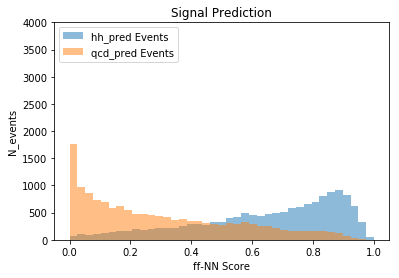

In [79]:
_nBins = 40
predictionResults = {'hh_pred':pred_hh, 'qcd_pred':pred_qcd}
compareManyHistograms( predictionResults, ['hh_pred', 'qcd_pred'], 2, 'Signal Prediction', 'ff-NN Score', 0, 1, _nBins, _savePlot=False )


In [80]:
# *** 4. Get best cut value for ff-NN assuming some minimal amount of signal
returnBestCutValue('ff-NN', pred_hh.copy(), pred_qcd.copy(), _minBackground=200, _testingFraction=testingFraction)

14560 14616
nSig = [1083.4776] , nBkg = [6824178.504] with significance = [0.41475798] for ff-NN score > [0.7008608]


(array([0.41475798]), array([0.7008608], dtype=float32))

In [ ]:
# *** 5. Get signifiance for any user-specified NN score cut value
cut = 0.81
_nSignal = sum( value > cut for value in pred_hh)*lumiScale_hh_to_qcd*totalLumi_HLLHC
_nBackground = sum( value > cut for value in pred_qcd)*totalLumi_HLLHC

print('nSig = {0} , nBkg = {1} with significance = {2} for NN score > {3}'.format(_nSignal, _nBackground, _nSignal/np.sqrt(_nBackground), cut) )

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


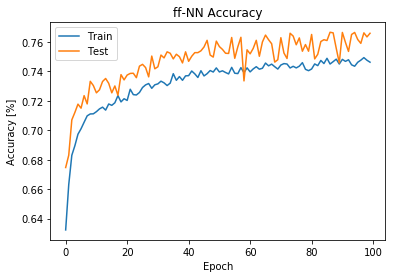

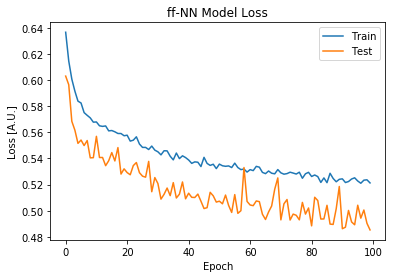

In [64]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ff-NN Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ff-NN Model Loss')
plt.ylabel('Loss [A.U.]')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [65]:
k_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_98 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________
